In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')

In [93]:
reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
88405,4859dc73eaeec4c7b7a2859304a5bf33,e199c3b74cd391568e7c99aa28b0f274,3,NaN,NaN,2017-11-25 00:00:00,2017-11-27 10:20:16
96202,b7f318f65274259caaf47fcff53c8b54,5f320558febd0e414d9a52714cfbae31,5,Perfeito,Foi um presente de casamento o casal adorou.,2018-08-09 00:00:00,2018-08-11 21:54:27
95551,90a3c6524413abf494461aba2a994572,1fbf5baa345604aa56a1e8a510eafd49,5,NaN,"A previsão seria para o dia 5, mas temos que d...",2018-01-07 00:00:00,2018-01-08 17:24:31
28978,256e445ddba830565ad576854f406761,dd6ee4d96f0f3cf1432c3b82818e0387,1,NaN,"sem comentarios, muito confusa a informação so...",2017-12-17 00:00:00,2017-12-19 11:50:50
35788,1439640ba4905dc2f98188cad2a77154,824fa8179b9911d58831e0b09eedde13,5,NaN,Estante chegou muito bem embalada e no prazo. ...,2017-07-27 00:00:00,2017-07-31 03:27:15
10650,3ca27d06d159dbf45850db737c059e4a,f733e2c200f38406f8a21125a05a5670,5,NaN,"Mercadoria entregue em ordem, antes do prazo f...",2017-05-17 00:00:00,2017-05-18 03:08:45
50157,7ea99aa9e157fb1ecdd55a7039190439,1bb1bff5951d630e985ec8d3f8037b86,1,Atraso na entrega,Comprei achando que iria receber em três dias ...,2018-08-10 00:00:00,2018-08-11 02:36:06
79025,cefed9314f9f2c6ef3b20bc4110707ca,a5fe635208239cb11b18044279ceebc5,5,Ótimo,"Veio corretamente, fiquei muito satisfeita.",2018-06-19 00:00:00,2018-06-19 22:05:41
67970,0c4587c8121dd229f1047afdcdb5858c,9380e70cfb5ded0ce59d85fbb2f16f88,5,NaN,NaN,2017-10-31 00:00:00,2017-10-31 14:45:55
21643,21646690ff007e352212c12d262b88ab,f2a368e50c1c94d8f9545b80031f0e7a,4,NaN,NaN,2018-07-26 00:00:00,2018-07-29 18:43:06


In [4]:
reviews_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [5]:
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')

In [6]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [7]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [8]:
sellers_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [9]:
work_df = pd.merge(
    orders_df,
    reviews_df[['order_id', 'review_score', 'review_comment_title', 'review_comment_message']],
    on='order_id',
    how='left'  # usa 'left' pra garantir que todas as orders apareçam mesmo sem review
)

In [10]:
work_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,Muito boa a loja,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,NaN,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,NaN,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,NaN,NaN
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,NaN,So uma peça que veio rachado mas tudo bem rs
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,NaN,Foi entregue antes do prazo.
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...


In [11]:
payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')

In [12]:
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [13]:
work_df = work_df.merge(
    payments_df[['order_id', 'payment_value']],  # traz só o que interessa
    on='order_id',
    how='left'  # mantém todas as orders, mesmo se algo não tiver payment
)

In [14]:
work_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,Muito boa a loja,Muito bom o produto.,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,NaN,NaN,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
104473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,NaN,NaN,85.08
104474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,195.00
104475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,NaN,Foi entregue antes do prazo.,271.01
104476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,441.16


In [15]:
work_df['order_status'].unique()


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [16]:
work_delivery_df = work_df[work_df['order_status'] == 'delivered'].copy()

In [17]:
work_delivery_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,Muito boa a loja,Muito bom o produto.,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,NaN,NaN,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
104473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,NaN,NaN,85.08
104474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,195.00
104475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,NaN,Foi entregue antes do prazo.,271.01
104476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,441.16


In [18]:
import matplotlib.pyplot as plt

In [19]:
work_delivery_df['order_purchase_timestamp'] = pd.to_datetime(work_delivery_df['order_purchase_timestamp'])

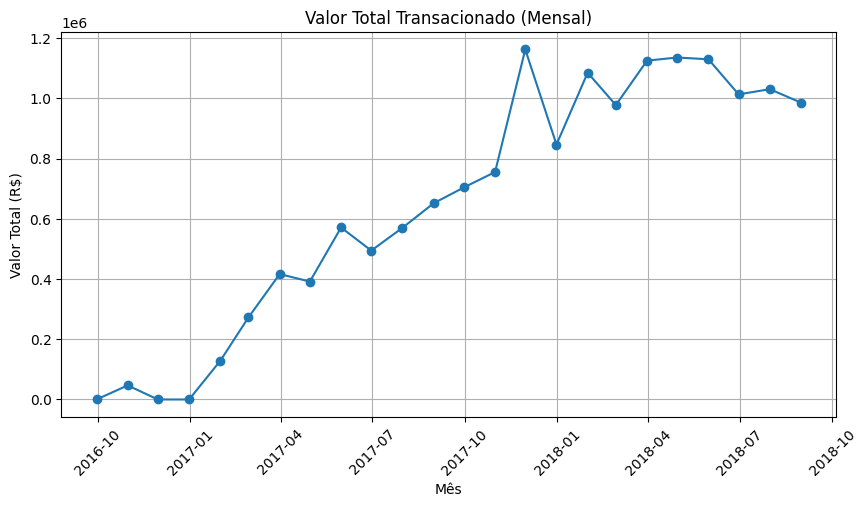

In [20]:
# valor total transacionado
monthly_value = (
    work_delivery_df
      .set_index('order_purchase_timestamp')
      .resample('M')['payment_value']
      .sum()
      .reset_index(name='total_value')
)

plt.figure(figsize=(10,5))
plt.plot(monthly_value['order_purchase_timestamp'], monthly_value['total_value'], marker='o')
plt.title('Valor Total Transacionado (Mensal)')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [72]:
monthly_orders = (
    work_df
      .set_index('order_purchase_timestamp')
      .resample('M')['order_id']
      .nunique()
      .reset_index(name='orders')
)

plt.figure(figsize=(10,5))
plt.plot(monthly_orders['order_purchase_timestamp'], monthly_orders['orders'], marker='o')
plt.title('Número de Orders por Mês (Total)')
plt.xlabel('Mês')
plt.ylabel('Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2) (Opcional) Somente delivered
work_delivery_df['order_purchase_timestamp'] = pd.to_datetime(work_delivery_df['order_purchase_timestamp'])
monthly_orders_delivered = (
    work_delivery_df
      .set_index('order_purchase_timestamp')
      .resample('M')['order_id']
      .nunique()
      .reset_index(name='orders')
)

plt.figure(figsize=(10,5))
plt.plot(monthly_orders_delivered['order_purchase_timestamp'], monthly_orders_delivered['orders'], marker='o')
plt.title('Número de Orders por Mês (Delivered)')
plt.xlabel('Mês')
plt.ylabel('Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

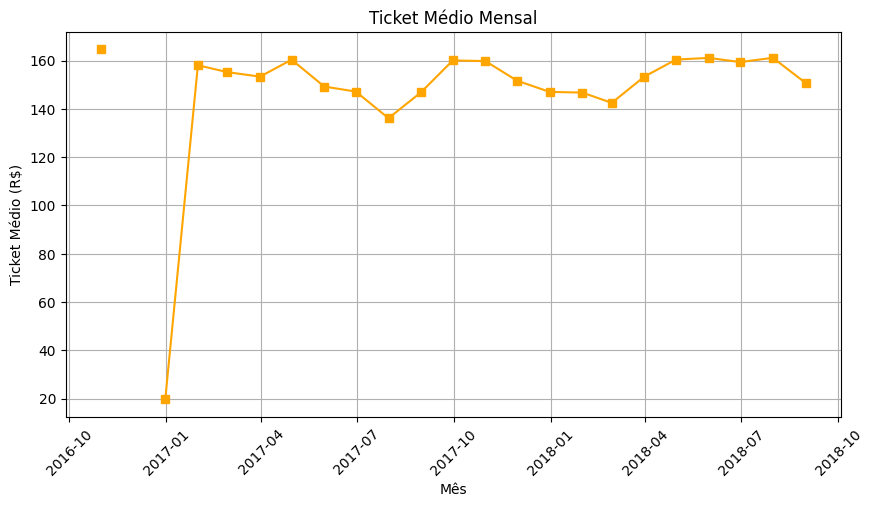

In [21]:
# ticket médio
monthly_avg_ticket = (
    work_delivery_df
      .set_index('order_purchase_timestamp')
      .resample('M')['payment_value']
      .mean()
      .reset_index(name='avg_ticket')
)

plt.figure(figsize=(10,5))
plt.plot(monthly_avg_ticket['order_purchase_timestamp'], monthly_avg_ticket['avg_ticket'], marker='s', color='orange')
plt.title('Ticket Médio Mensal')
plt.xlabel('Mês')
plt.ylabel('Ticket Médio (R$)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

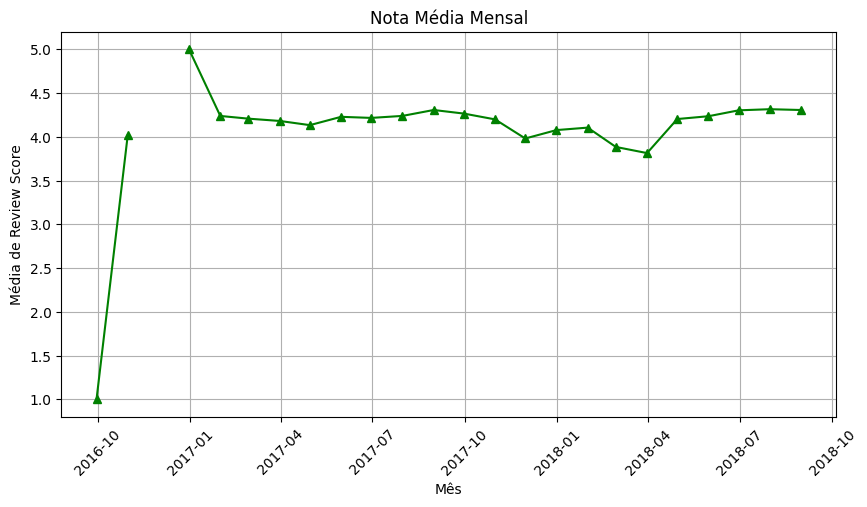

In [22]:
monthly_review = (
    work_delivery_df
      .set_index('order_purchase_timestamp')
      .resample('M')['review_score']
      .mean()
      .reset_index(name='avg_review')
)

plt.figure(figsize=(10,5))
plt.plot(monthly_review['order_purchase_timestamp'], monthly_review['avg_review'], marker='^', color='green')
plt.title('Nota Média Mensal')
plt.xlabel('Mês')
plt.ylabel('Média de Review Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [23]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install torch torchvision torchaudio --quiet


In [26]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [44]:
def get_sentiment_label(text):
    if pd.isna(text) or text.strip() == "":
        return None
    result = sentiment_pipeline(text[:512])[0]  # truncar se texto for muito longo
    return result['label']

work_delivery_df['sentiment'] = work_delivery_df['review_comment_message'].apply(get_sentiment_label)

In [45]:
work_delivery_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,payment_value,sentiment_label_raw,sentiment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.12,NEGATIVE,NEGATIVE
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2.00,NEGATIVE,NEGATIVE
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",18.59,NEGATIVE,NEGATIVE
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,Muito boa a loja,Muito bom o produto.,141.46,NEGATIVE,NEGATIVE
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,NaN,NaN,179.12,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,NaN,NaN,85.08,None,None
104474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,195.00,NEGATIVE,NEGATIVE
104475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,NaN,Foi entregue antes do prazo.,271.01,POSITIVE,POSITIVE
104476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,441.16,POSITIVE,POSITIVE


SyntaxError: incomplete input (3956084846.py, line 9)

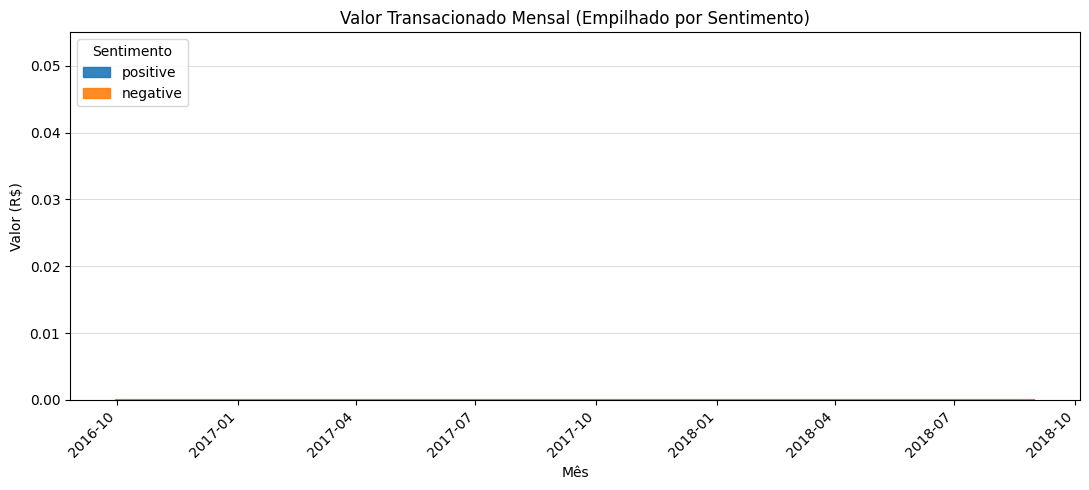

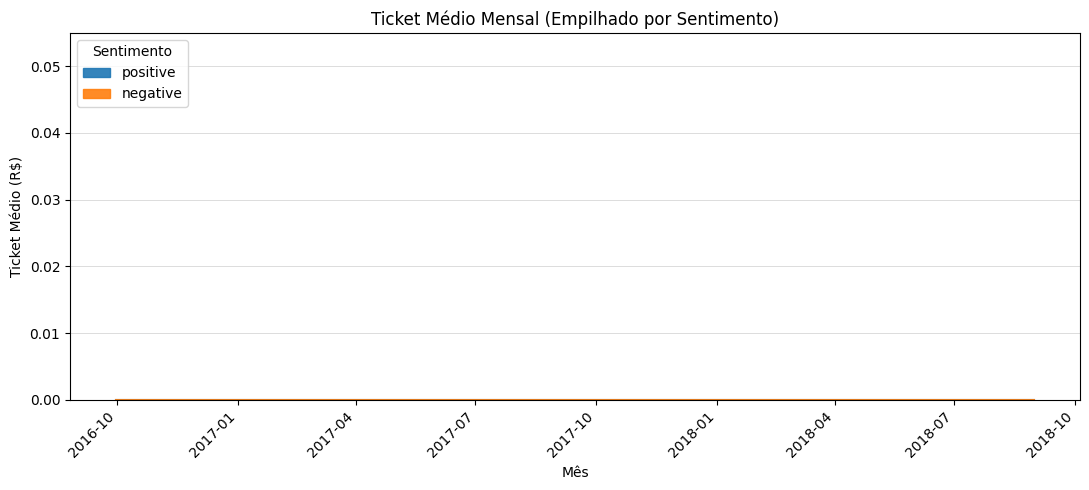

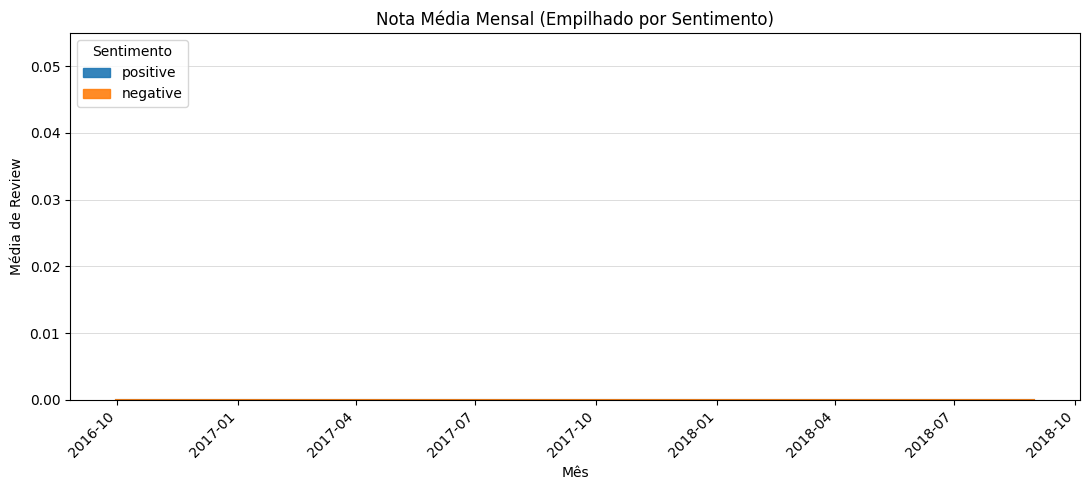

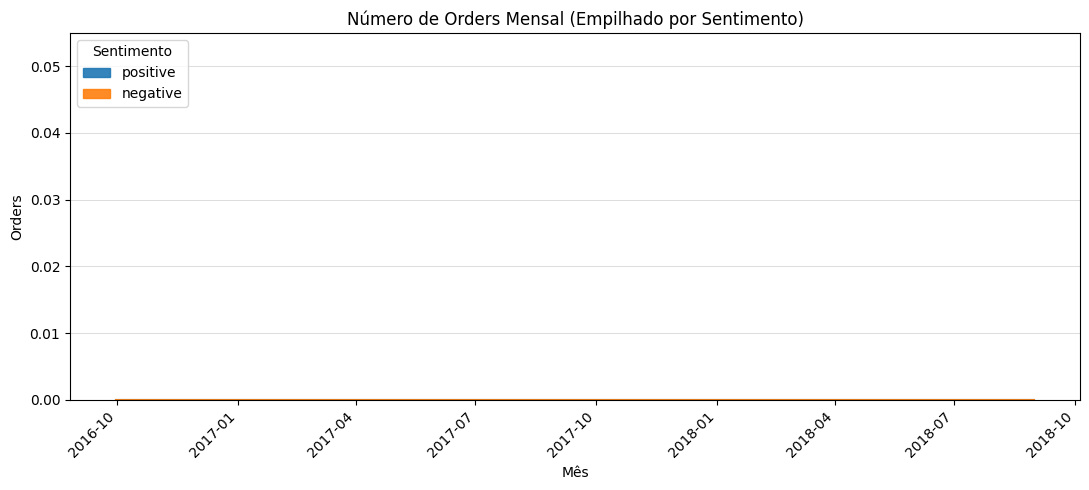

In [47]:
# 1) Agregação mensal por sentimento
monthly = (
    work_delivery_df
      .groupby([pd.Grouper(key='order_purchase_timestamp', freq='M'), 'sentiment'])
      .agg(
          value_sum=('payment_value', 'sum'),             # valor transacionado no mês por sentimento
          orders=('order_id', 'nunique'),         # nº de pedidos no mês por sentimento
          avg_review=('review_score', 'mean')     # média de review no mês por sentimento
      )
      .reset_index()
)

# Ticket médio mensal por sentimento = soma dos valores / nº de pedidos
monthly['avg_ticket'] = monthly['value_sum'] / monthly['orders']

# 2) Função utilitária para stacked area (empilhado por sentimento)
def stacked_area(df, metric, title, ylabel):
    # pivot com colunas na ordem desejada
    pivot = (
        df.pivot_table(
            index='order_purchase_timestamp',
            columns='sentiment',
            values=metric,
            aggfunc='sum'
        )
        .reindex(columns=['positive', 'negative'])  # força ordem
        .fillna(0)
    )
    ax = pivot.plot.area(stacked=True, figsize=(11,5), alpha=0.9)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Mês')
    plt.xticks(rotation=45)
    plt.legend(title='Sentimento', loc='upper left')
    plt.grid(True, axis='y', linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()

# 3) Plotar os 4 gráficos SEM a série "total", apenas sentimentos empilhados
# 3.1 Valor transacionado mensal (soma)
stacked_area(monthly, 'value_sum', 'Valor Transacionado Mensal (Empilhado por Sentimento)', 'Valor (R$)')

# 3.2 Ticket médio mensal (média) — empilhado por sentimento (atende seu pedido)
stacked_area(monthly, 'avg_ticket', 'Ticket Médio Mensal (Empilhado por Sentimento)', 'Ticket Médio (R$)')

# 3.3 Nota média mensal (média) — empilhado por sentimento (atende seu pedido)
stacked_area(monthly, 'avg_review', 'Nota Média Mensal (Empilhado por Sentimento)', 'Média de Review')

# 3.4 Quantidade de pedidos (contagem)
stacked_area(monthly, 'orders', 'Número de Orders Mensal (Empilhado por Sentimento)', 'Orders')

In [49]:
!pip install unidecode

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import unidecode
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

# inicializações
stop_words = set(stopwords.words('portuguese'))
stemmer = RSLPStemmer()

def cleaning(sentence):
    if not isinstance(sentence, str) or sentence.strip() == "":
        return ""

    # Basic cleaning
    sentence = sentence.lower()                                 # lowercasing
    sentence = ''.join(char for char in sentence if not char.isdigit())  # remove números
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')             # remove pontuação

    # Advanced cleaning
    tokenized_sentence = word_tokenize(sentence)                 # tokenização
    tokenized_sentence = [w for w in tokenized_sentence if w not in stop_words]  # remove stopwords
    stemmed_sentence = [stemmer.stem(word) for word in tokenized_sentence]       # radicalização
    decoded_sentence = [unidecode.unidecode(w) for w in stemmed_sentence]        # remove acentos

    cleaned_sentence = ' '.join(decoded_sentence)
    return cleaned_sentence

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/netoconcon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/netoconcon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /Users/netoconcon/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [51]:
work_delivery_df['clean_review'] = work_delivery_df['review_comment_message'].apply(cleaning)

In [52]:
work_delivery_df['clean_review'].sample(20)

88964     produt vei desfalqu pinturaarranh nao lig nenh...
11028                                                      
72301     bonit resist cheg ant praz estipul bem embal o...
97047                            receb tud cert bom est uso
94602                                                      
16829                                rap simpl pra recomend
31470                                                      
64379     compr doi produt receb soment mand doi email l...
29287                                                      
68747     receb produt danific malet opc ped solicit can...
67012                                                      
86060                            baix val fret sid pouc car
60128                                                      
75885                                                      
28898                                                      
63728                                                      
103162                                  

In [53]:
bad_review_df = work_delivery_df[work_delivery_df['review_score'].isin([1, 2])].copy()
good_review_df = work_delivery_df[work_delivery_df['review_score'].isin([5])].copy()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

def run_lda_with_tfidf(df, text_col='clean_review', n_topics=3, max_features=5000, max_df=0.75, ngram_range=(1,2), topwords=10):
    corpus = df[text_col].fillna("").astype(str)

    vectorizer = TfidfVectorizer(max_df=max_df, max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    print(f"TF-IDF shape: {X.shape}")

    lda = LatentDirichletAllocation(n_components=n_topics, learning_method='batch', random_state=42)
    lda.fit(X)

    doc_mix = lda.transform(X)
    doc_mix_df = pd.DataFrame(doc_mix, columns=[f"Topic {i+1}" for i in range(n_topics)])

    topic_mixture = pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names_out())
    print(f"document_mixture shape: {doc_mix_df.shape}")
    print(f"topic_mixture shape: {topic_mixture.shape}")

    def topic_word(vectorizer, topic_vector, k, with_weights=True):
        idxs = topic_vector.argsort()[:-k-1:-1]
        if with_weights:
            return [(vectorizer.get_feature_names_out()[i], round(topic_vector[i], 2)) for i in idxs]
        return [vectorizer.get_feature_names_out()[i] for i in idxs]

    def print_topics(vectorizer, lda_model, k=10):
        for t_idx, topic in enumerate(lda_model.components_):
            print("-"*20)
            print(f"Topic {t_idx+1}:")
            print(topic_word(vectorizer, topic, k))

    print("\n== Top Palavras por Tópico (TF-IDF) ==")
    print_topics(vectorizer, lda, k=topwords)

    return {
        "vectorizer": vectorizer,
        "lda": lda,
        "X": X,
        "document_mixture": doc_mix_df,
        "topic_mixture": topic_mixture
    }




In [58]:

bad_tfidf = run_lda_with_tfidf(bad_review_df, text_col='clean_review', n_topics=5, topwords=8)

TF-IDF shape: (12941, 5000)
document_mixture shape: (12941, 5)
topic_mixture shape: (5, 5000)

== Top Palavras por Tópico (TF-IDF) ==
--------------------
Topic 1:
[('vei', 187.83), ('compr', 96.67), ('produt', 94.92), ('produt vei', 76.08), ('doi', 62.82), ('receb', 60.77), ('defeit', 60.18), ('apen', 57.73)]
--------------------
Topic 2:
[('produt', 155.18), ('cheg', 154.79), ('entreg', 146.93), ('receb', 118.55), ('dia', 116.36), ('compr', 104.39), ('aind', 98.93), ('praz', 67.97)]
--------------------
Topic 3:
[('produt', 247.19), ('receb', 241.29), ('receb produt', 205.8), ('aind', 120.4), ('entreg', 87.53), ('nao', 81.96), ('aind receb', 78.85), ('produt entreg', 60.99)]
--------------------
Topic 4:
[('qual', 70.77), ('produt', 67.83), ('pess', 54.55), ('entreg', 46.83), ('demor', 41.73), ('pess qual', 32.29), ('recom', 31.13), ('loj', 28.89)]
--------------------
Topic 5:
[('entreg', 97.63), ('receb', 63.96), ('compr', 61.91), ('produt', 58.44), ('correi', 53.34), ('atras', 48.

In [59]:
good_tfidf = run_lda_with_tfidf(good_review_df, text_col='clean_review', n_topics=5, topwords=8)

TF-IDF shape: (59547, 5000)
document_mixture shape: (59547, 5)
topic_mixture shape: (5, 5000)

== Top Palavras por Tópico (TF-IDF) ==
--------------------
Topic 1:
[('praz', 544.01), ('entreg', 443.28), ('produt', 430.72), ('ant', 416.16), ('ant praz', 395.01), ('excel', 389.58), ('tud', 337.26), ('perfeit', 324.09)]
--------------------
Topic 2:
[('otim', 1124.44), ('produt', 487.49), ('qual', 429.6), ('otim produt', 280.92), ('gost', 231.16), ('excel', 193.75), ('produt otim', 177.74), ('otim qual', 162.97)]
--------------------
Topic 3:
[('cheg', 354.92), ('ant', 295.59), ('praz', 279.2), ('ant praz', 230.51), ('cheg ant', 217.96), ('produt', 182.44), ('sup', 169.84), ('recom', 156.86)]
--------------------
Topic 4:
[('recom', 443.63), ('bem', 245.08), ('rapid', 242.73), ('cheg', 229.6), ('entreg', 210.27), ('produt', 198.2), ('ant', 183.47), ('previst', 180.72)]
--------------------
Topic 5:
[('bom', 1036.37), ('satisfeit', 326.48), ('atend', 239.04), ('compr', 219.49), ('entreg', 

In [60]:
bad_results = run_lda_with_tfidf(bad_review_df, text_col='clean_review', n_topics=5, topwords=8)

TF-IDF shape: (12941, 5000)
document_mixture shape: (12941, 5)
topic_mixture shape: (5, 5000)

== Top Palavras por Tópico (TF-IDF) ==
--------------------
Topic 1:
[('vei', 187.83), ('compr', 96.67), ('produt', 94.92), ('produt vei', 76.08), ('doi', 62.82), ('receb', 60.77), ('defeit', 60.18), ('apen', 57.73)]
--------------------
Topic 2:
[('produt', 155.18), ('cheg', 154.79), ('entreg', 146.93), ('receb', 118.55), ('dia', 116.36), ('compr', 104.39), ('aind', 98.93), ('praz', 67.97)]
--------------------
Topic 3:
[('produt', 247.19), ('receb', 241.29), ('receb produt', 205.8), ('aind', 120.4), ('entreg', 87.53), ('nao', 81.96), ('aind receb', 78.85), ('produt entreg', 60.99)]
--------------------
Topic 4:
[('qual', 70.77), ('produt', 67.83), ('pess', 54.55), ('entreg', 46.83), ('demor', 41.73), ('pess qual', 32.29), ('recom', 31.13), ('loj', 28.89)]
--------------------
Topic 5:
[('entreg', 97.63), ('receb', 63.96), ('compr', 61.91), ('produt', 58.44), ('correi', 53.34), ('atras', 48.

In [61]:
bad_review_df = bad_review_df.reset_index(drop=True)

# Pegar o tópico mais provável por linha
bad_review_df['dominant_topic'] = bad_results['document_mixture'].idxmax(axis=1)

In [62]:
topic_map = {
    'Topic 1': 'qualidade',
    'Topic 2': 'entrega',
    'Topic 3': 'entrega',
    'Topic 4': 'entrega',
    'Topic 5': 'entrega'
}

bad_review_df['problema'] = bad_review_df['dominant_topic'].map(topic_map).fillna('')

In [63]:
bad_review_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,payment_value,sentiment_label_raw,sentiment,clean_review,dominant_topic,problema
0,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1.0,NaN,NaN,35.95,None,None,,Topic 1,qualidade
1,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,1.0,NaN,Aguardando retorno da loja,259.06,NEGATIVE,NEGATIVE,aguard retorn loj,Topic 2,entrega
2,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,2.0,NaN,os correios estäo em greve... näo recebi nenhu...,118.86,NEGATIVE,NEGATIVE,correi esta grev nao receb nenhum avis atras q...,Topic 5,entrega
3,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12 00:00:00,2.0,NaN,Demora muito entregar. Já passou o prazo e ain...,125.43,NEGATIVE,NEGATIVE,dem entreg pass praz aind receb encomend,Topic 2,entrega
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,227.68,NEGATIVE,NEGATIVE,moment receb produt prote colcha berc algod im...,Topic 2,entrega
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,41d74f5b8f1fb05bdec674cbba8f720f,960ddf99f2e615bf50ea0cf4e71f526f,delivered,2018-02-04 14:35:02,2018-02-04 14:50:22,2018-02-07 15:35:29,2018-02-15 19:35:37,2018-03-01 00:00:00,1.0,NaN,Não gostei imaginei que era uma cortina de tec...,50.85,NEGATIVE,NEGATIVE,gost imagin cortin tec bonit entant nylon mal ...,Topic 1,qualidade
12937,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,1.0,NaN,nao recebi o produto que ja paguei ! nao recom...,48.75,NEGATIVE,NEGATIVE,nao receb produt ja pag nao recom compr ness sit,Topic 5,entrega
12938,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09 00:00:00,1.0,NaN,"Prateleiras com cantos vivo, colunas nao encai...",146.83,NEGATIVE,NEGATIVE,pratel cant viv colun nao encaix falt arroel n...,Topic 1,qualidade
12939,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1.0,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",71.04,NEGATIVE,NEGATIVE,min cajon shak chocalh imit cajon pess,Topic 3,entrega


In [68]:
# Carregar as tabelas necessárias
order_items = pd.read_csv('data/olist_order_items_dataset.csv')[['order_id', 'seller_id']]

# --- Relação order–seller ---
order_sellers = order_items.drop_duplicates()

# --- Adicionar valor total do pedido (somando pagamentos) ---
order_values = payments_df.groupby('order_id', as_index=False)['payment_value'].sum()

# --- Juntar order, seller e valor ---
order_seller_value = (
    order_sellers
      .merge(order_values, on='order_id', how='left')
      .fillna({'payment_value': 0})
)

# --- Total de pedidos entregues ---
delivered_orders = work_delivery_df[['order_id']].drop_duplicates()
delivered_order_sellers = (
    order_seller_value.merge(delivered_orders, on='order_id', how='inner').drop_duplicates()
)

seller_totals = (
    delivered_order_sellers
      .groupby('seller_id', as_index=False)
      .agg(
          total_orders=('order_id', 'nunique'),
          total_value=('payment_value', 'sum')
      )
)

# --- Bad reviews e tipos de problema ---
bad_review_orders = bad_review_df[['order_id', 'problema']].drop_duplicates()

bad_review_sellers = (
    order_seller_value
      .merge(bad_review_orders, on='order_id', how='inner')
      .drop_duplicates()
)

# --- Métricas de bad reviews por seller ---
bad_by_seller = (
    bad_review_sellers
      .groupby('seller_id')
      .agg(
          bad_orders=('order_id', 'nunique'),
          bad_value=('payment_value', 'sum'),
          bad_quality=('problema', lambda s: (s == 'qualidade').sum()),
          bad_entrega=('problema', lambda s: (s == 'entrega').sum())
      )
      .reset_index()
)

# --- Consolidar ---
seller_metrics = seller_totals.merge(bad_by_seller, on='seller_id', how='left').fillna(0)

# --- Calcular taxas ---
seller_metrics['bad_rate'] = seller_metrics['bad_orders'] / seller_metrics['total_orders']
seller_metrics['bad_value_rate'] = seller_metrics['bad_value'] / seller_metrics['total_value']
seller_metrics['bad_quality_rate'] = seller_metrics['bad_quality'] / seller_metrics['total_orders']
seller_metrics['bad_entrega_rate'] = seller_metrics['bad_entrega'] / seller_metrics['total_orders']

# --- Filtrar sellers com volume mínimo (ex: 30 orders) ---
seller_metrics_filtered = (
    seller_metrics[seller_metrics['total_orders'] >= 30]
      .sort_values(['bad_rate', 'bad_orders'], ascending=[False, False])
)

# --- Ver resultado ---
display_cols = [
    'seller_id', 'total_orders', 'total_value',
    'bad_orders', 'bad_value', 'bad_rate', 'bad_value_rate',
    'bad_quality', 'bad_entrega', 'bad_quality_rate', 'bad_entrega_rate'
]
seller_metrics_filtered[display_cols].head(20)

,seller_id,total_orders,total_value,bad_orders,bad_value,bad_rate,bad_value_rate,bad_quality,bad_entrega,bad_quality_rate,bad_entrega_rate
323,1ca7077d890b907f89be8c954a02686a,108,14102.15,64.0,9665.97,0.592593,0.685425,9.0,55.0,0.083333,0.509259
540,2eb70248d66e0e3ef83659f71b244378,187,42189.53,88.0,17980.50,0.470588,0.426184,32.0,56.0,0.171123,0.299465
1779,972d0f9cf61b499a4812cf0bfa3ad3c4,81,10608.08,33.0,4626.73,0.407407,0.436151,19.0,14.0,0.234568,0.172840
1928,a49928bcdf77c55c6d6e05e09a9b4ca5,96,10464.15,39.0,4630.79,0.406250,0.442539,22.0,17.0,0.229167,0.177083
2171,bbad7e518d7af88a0897397ffdca1979,68,6604.60,27.0,3274.36,0.397059,0.495770,9.0,18.0,0.132353,0.264706
1000,54965bbe3e4f07ae045b90b0b8541f52,73,12794.18,28.0,5068.15,0.383562,0.396129,6.0,22.0,0.082192,0.301370
1313,6fd52c528dcb38be2eea044946b811f8,67,8881.58,24.0,3083.87,0.358209,0.347221,9.0,15.0,0.134328,0.223881
478,2a1348e9addc1af5aaa619b1a3679d6b,48,3862.79,17.0,1698.54,0.354167,0.439718,7.0,10.0,0.145833,0.208333
1139,602044f2c16190c2c6e45eb35c2e21cb,48,4689.59,17.0,1909.80,0.354167,0.407242,8.0,9.0,0.166667,0.187500
1336,712e6ed8aa4aa1fa65dab41fed5737e4,77,46149.82,27.0,17077.85,0.350649,0.370052,10.0,17.0,0.129870,0.220779


In [82]:
sellers_com_problema = (
    seller_metrics[
        (seller_metrics['total_orders'] >= 10) &
        (seller_metrics['bad_rate'] > 0.2)
    ]
    .sort_values('bad_rate', ascending=False)
)

# Colunas principais pra exibir
display_cols = [
    'seller_id', 'total_orders', 'total_value',
    'bad_orders', 'bad_value',
    'bad_rate', 'bad_value_rate',
    'bad_quality', 'bad_entrega',
    'bad_quality_rate', 'bad_entrega_rate'
]

sellers_com_problema[display_cols].head(20)

,seller_id,total_orders,total_value,bad_orders,bad_value,bad_rate,bad_value_rate,bad_quality,bad_entrega,bad_quality_rate,bad_entrega_rate
2053,b1b3948701c5c72445495bd161b83a4c,14,21924.25,10.0,18703.44,0.714286,0.853094,3.0,7.0,0.214286,0.500000
323,1ca7077d890b907f89be8c954a02686a,108,14102.15,64.0,9665.97,0.592593,0.685425,9.0,55.0,0.083333,0.509259
1092,5bc55dbe2f12b6af6d83ed46023e0dc8,17,3960.21,10.0,2307.54,0.588235,0.582681,4.0,6.0,0.235294,0.352941
751,40db9e9aa57f7bb151bcda6b0f9bdbb7,12,23823.99,7.0,13646.91,0.583333,0.572822,2.0,5.0,0.166667,0.416667
540,2eb70248d66e0e3ef83659f71b244378,187,42189.53,88.0,17980.50,0.470588,0.426184,32.0,56.0,0.171123,0.299465
30,02d35243ea2e497335cd0f076b45675d,14,7216.21,6.0,3857.88,0.428571,0.534613,4.0,2.0,0.285714,0.142857
2270,c37b2059d4f90d4feead554e5246565e,12,1578.20,5.0,797.94,0.416667,0.505601,1.0,4.0,0.083333,0.333333
2673,e64d65bc8dbec2accda90c58de5d1246,12,1899.96,5.0,864.42,0.416667,0.454967,1.0,4.0,0.083333,0.333333
2751,ecccfa2bb93b34a3bf033cc5d1dcdc69,12,1189.86,5.0,459.67,0.416667,0.386323,0.0,5.0,0.000000,0.416667
1779,972d0f9cf61b499a4812cf0bfa3ad3c4,81,10608.08,33.0,4626.73,0.407407,0.436151,19.0,14.0,0.234568,0.172840


In [83]:
# 1) Pegar a lista dos sellers problemáticos
sellers_ruins = sellers_com_problema['seller_id'].unique().tolist()

# 2) Carregar order_items (pra saber quais pedidos pertencem a esses sellers)
order_items = pd.read_csv('data/olist_order_items_dataset.csv')[['order_id', 'seller_id']]

# 3) Marcar se cada pedido envolve algum seller ruim
orders_com_seller_ruim = (
    order_items[order_items['seller_id'].isin(sellers_ruins)]
    .drop_duplicates(subset=['order_id'])
)

# 4) Criar flag no dataframe principal
work_delivery_df['tem_seller_ruim'] = work_delivery_df['order_id'].isin(orders_com_seller_ruim['order_id'])

# 5) Separar dois universos
df_com_ruins = work_delivery_df.copy()
df_sem_ruins = work_delivery_df[~work_delivery_df['tem_seller_ruim']].copy()

In [84]:
def evolucao_mensal(df, label):
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    mensal = (
        df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M'))
          .agg(
              valor_total=('payment_value', 'sum'),
              nota_media=('review_score', 'mean'),
              total_pedidos=('order_id', 'nunique')
          )
          .reset_index()
    )
    mensal['cenário'] = label
    return mensal

mensal_com_ruins = evolucao_mensal(df_com_ruins, 'Com sellers ruins')
mensal_sem_ruins = evolucao_mensal(df_sem_ruins, 'Sem sellers ruins')

comparativo = pd.concat([mensal_com_ruins, mensal_sem_ruins])

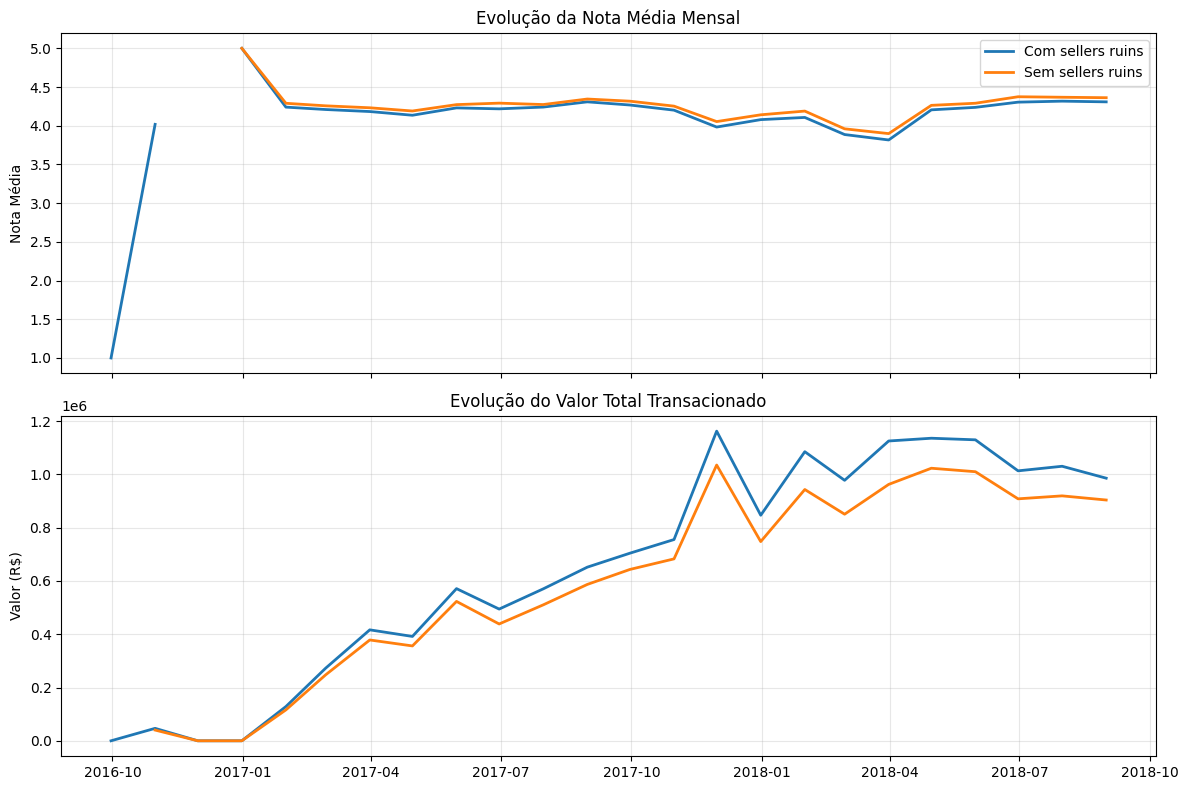

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Nota média mensal
for cenário, grupo in comparativo.groupby('cenário'):
    axes[0].plot(grupo['order_purchase_timestamp'], grupo['nota_media'], label=cenário, linewidth=2)
axes[0].set_title('Evolução da Nota Média Mensal')
axes[0].set_ylabel('Nota Média')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Valor total transacionado
for cenário, grupo in comparativo.groupby('cenário'):
    axes[1].plot(grupo['order_purchase_timestamp'], grupo['valor_total'], label=cenário, linewidth=2)
axes[1].set_title('Evolução do Valor Total Transacionado')
axes[1].set_ylabel('Valor (R$)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [86]:
def calcular_nps(df):
    total = len(df)
    promotores = (df['review_score'] == 5).sum()
    detratores = (df['review_score'].isin([1, 2])).sum()
    passivos = (df['review_score'].isin([3, 4])).sum()
    
    nps = ((promotores - detratores) / total) * 100
    return {
        'total_reviews': total,
        'promotores': promotores,
        'passivos': passivos,
        'detratores': detratores,
        'nps': nps
    }

nps_com_ruins = calcular_nps(df_com_ruins)
nps_sem_ruins = calcular_nps(df_sem_ruins)

print("NPS com sellers ruins:", round(nps_com_ruins['nps'], 2))
print("NPS sem sellers ruins:", round(nps_sem_ruins['nps'], 2))

NPS com sellers ruins: 46.0
NPS sem sellers ruins: 49.16


In [91]:
df_com_ruins.shape

(101326, 16)

In [94]:
# Garante lista de sellers problemáticos
sellers_ruins = sellers_com_problema['seller_id'].unique().tolist()

# Pega todos os pedidos ligados a esses sellers
orders_com_sellers_ruins = (
    order_items[order_items['seller_id'].isin(sellers_ruins)]
    .drop_duplicates(subset=['order_id'])
)

# Total de pedidos desses sellers
total_pedidos_ruins = orders_com_sellers_ruins['order_id'].nunique()

# Total geral de pedidos entregues
total_pedidos_geral = work_delivery_df['order_id'].nunique()

# Percentual de impacto
percentual = (total_pedidos_ruins / total_pedidos_geral) * 100

print(f"Pedidos com sellers ruins: {total_pedidos_ruins:,}")
print(f"Pedidos totais entregues: {total_pedidos_geral:,}")
print(f"Representam {percentual:.2f}% de todos os pedidos entregues.")

Pedidos com sellers ruins: 9,891
Pedidos totais entregues: 96,478
Representam 10.25% de todos os pedidos entregues.


In [96]:
9891 / 219997

0.04495970399596358

In [95]:
bad_review_df.size

219997

In [98]:
sellers_df['seller_id'].unique().size

3095

In [99]:
16/ 3095

0.005169628432956382